# Kidney_1_dense

In [1]:
import os
import pandas as pd
from PIL import Image
import torch
from torchvision.transforms import ToTensor
from tqdm import tqdm
import matplotlib.pyplot as plt
import random
import numpy as np

In [2]:
input_dir = "/kaggle/input/blood-vessel-segmentation/"

### ¿What are the files like?

In [3]:
k1_dense_path = f"{input_dir}train/kidney_1_dense/"
k1_dense_imgs = pd.Series(os.listdir(f"{k1_dense_path}images")).sort_values()
k1_dense_labels = pd.Series(os.listdir(f"{k1_dense_path}labels")).sort_values()

display(k1_dense_imgs)
display(k1_dense_labels)

1399    0000.tif
901     0001.tif
1193    0002.tif
2139    0003.tif
1940    0004.tif
          ...   
619     2274.tif
1994    2275.tif
441     2276.tif
1283    2277.tif
1738    2278.tif
Length: 2279, dtype: object

1399    0000.tif
901     0001.tif
1193    0002.tif
2139    0003.tif
1940    0004.tif
          ...   
619     2274.tif
1994    2275.tif
441     2276.tif
1283    2277.tif
1738    2278.tif
Length: 2279, dtype: object

#### ¿How many of them are there?

In [4]:
k1_dense_imgs.nunique(), k1_dense_labels.nunique() 

(2279, 2279)

### ¿All the images and masks have the same shapes?

In [5]:
# check if all the images have the same shape
images_shapes = []
for idx in tqdm(range(len(k1_dense_imgs))):
    image = Image.open(k1_dense_path + "images/" + k1_dense_imgs[idx])
    images_shapes.append((image.height, image.width))

images_shapes = set(images_shapes)
images_shapes

  1%|          | 27/2279 [00:00<00:46, 48.09it/s]

100%|██████████| 2279/2279 [00:40<00:00, 56.25it/s]


{(1303, 912)}

In [6]:
# check if all the labels have the same shape
labels_shapes = []
for idx in tqdm(range(len(k1_dense_labels))):
    image = Image.open(k1_dense_path + "labels/" + k1_dense_labels[idx])
    labels_shapes.append((image.height, image.width))

labels_shapes = set(labels_shapes)
labels_shapes

100%|██████████| 2279/2279 [00:30<00:00, 74.43it/s] 


{(1303, 912)}

### ¿What are the values of the masks?

In [7]:
mask_values = set()
for idx in tqdm(range(len(k1_dense_labels))):
    label = Image.open(k1_dense_path + "labels/" + k1_dense_labels[idx])
    mask_values.update(ToTensor()(label).unique().tolist())
print(mask_values)

100%|██████████| 2279/2279 [01:11<00:00, 31.75it/s]

{0.0, 1.0}


### ¿What about the values of the images?

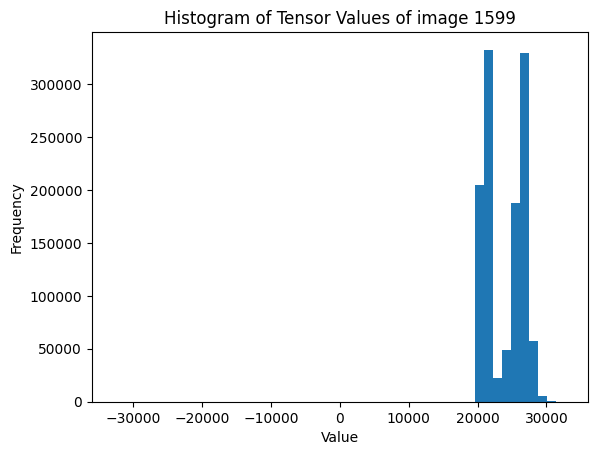

In [8]:
idx = random.randint(0, len(k1_dense_imgs))

image = ToTensor()(Image.open(k1_dense_path + "images/" + k1_dense_imgs[idx]))

plt.hist(image.view(-1).numpy(), 50) 

plt.title(f'Histogram of Tensor Values of image {idx}')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()

**Observation**

- As we can see the array values of some images take very different shapes.

### Let's look at some examples

Index 956 of 2279


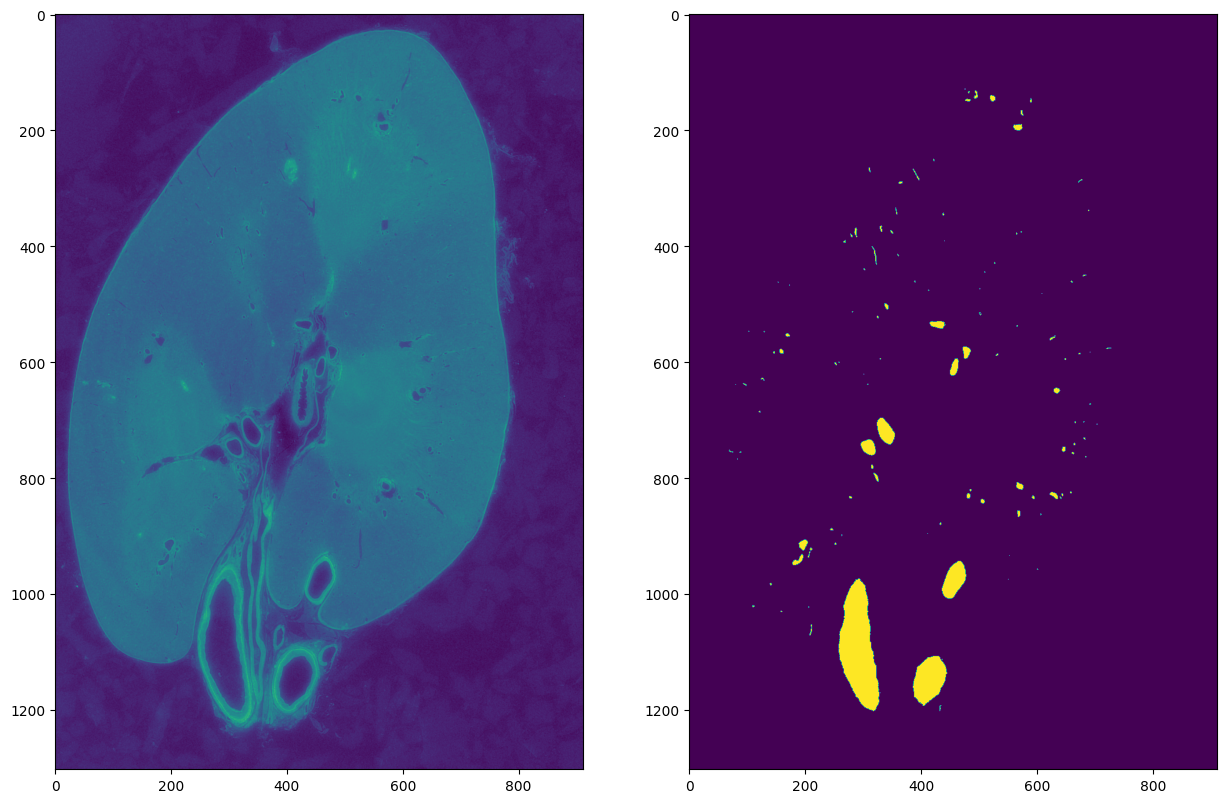

In [9]:
idx = random.randint(0, len(k1_dense_imgs))

image = Image.open(k1_dense_path + "images/" + k1_dense_imgs[idx])
label = Image.open(k1_dense_path + "labels/" + k1_dense_labels[idx])

fig, ax = plt.subplots(1, 2, figsize=(15, 11))
ax[0].imshow(image)
ax[1].imshow(label)

print("Index", idx, "of", len(k1_dense_imgs))
plt.show()

**Observations**

- There seems to be background and kidney. The actual kidney section in the image varies in size from image to image.
- The blood vessels are generaly round.
    - They also seem to have a "light" border.
- Most annnotations are REALLY small.
- It appears to me that some images look sharper than others.
- There are big light variations, compare indices 6 and 7. ¿Why is this?
- Maybe some artifacts, like really bright and really dark spots.